# Gaussian model

- simulator taken from https://github.com/mackelab/SNL_py3port, which contains the original https://github.com/gpapamak/snl after 2to3 conversion with minimal edits (deactivating generator-internal summary stats normalization).
- WIP

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import timeit

from delfi.utils.viz import plot_pdf
import delfi.inference as infer
import delfi.distribution as dd

from lfimodels.snl_exps.util import save_results, load_results
from lfimodels.snl_exps.util import init_g_gauss as init_g
from lfimodels.snl_exps.util import load_setup_gauss as load_setup
from lfimodels.snl_exps.util import load_gt_gauss as load_gt
from lfimodels.snl_exps.util import calc_all_lprob_errs

seed = 42

model_id = 'gauss'
save_path = 'results/' + model_id + '_box_validationset'
exp_id = 'seed'+str(seed)


# simulation setup
setup_dict = load_setup()

pars_true, obs_stats = load_gt(generator=init_g(seed=seed))
print('pars_true : ', pars_true)
print('obs_stats : ', obs_stats)


pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]


Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_2rapy0p2.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce RTX 2080 (0000:42:00.0)


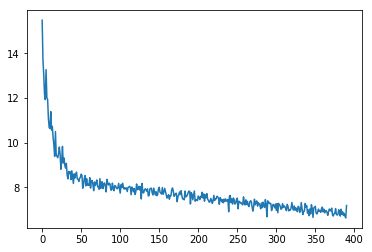

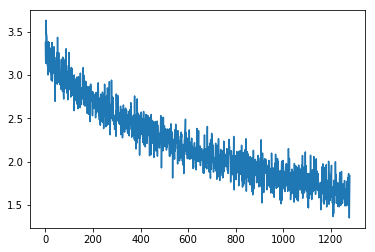

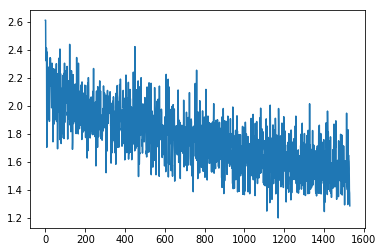

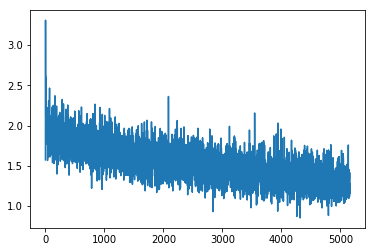

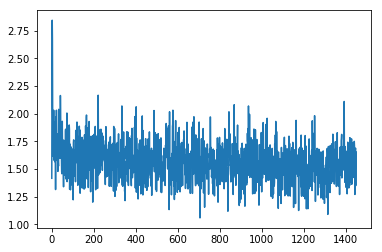

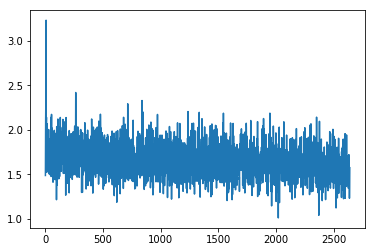

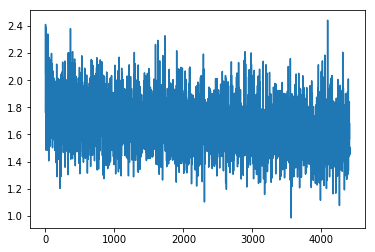

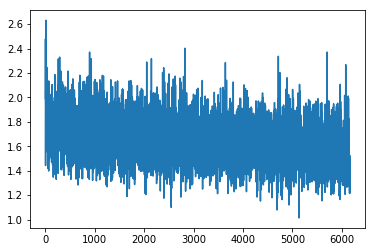

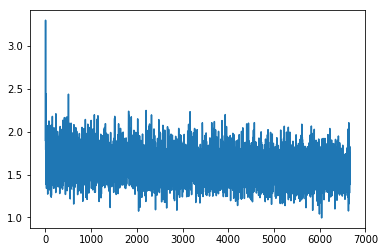

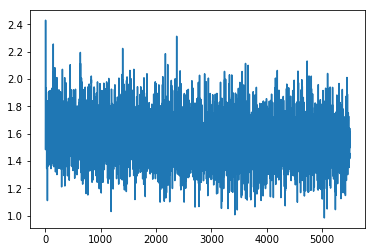

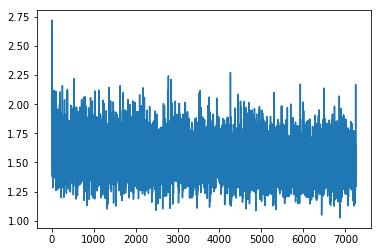

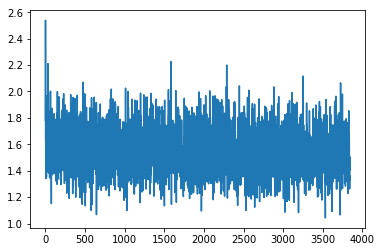

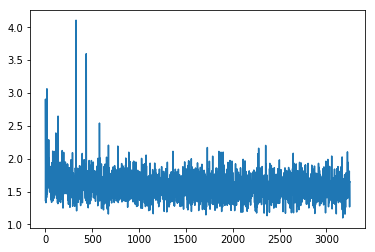

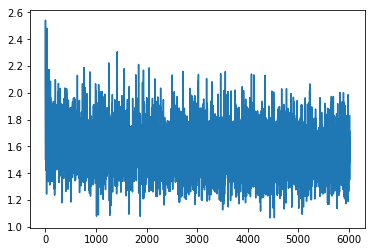

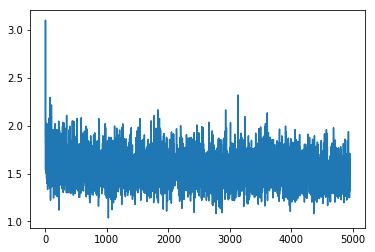

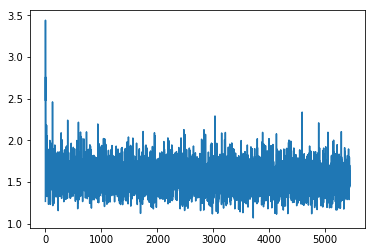

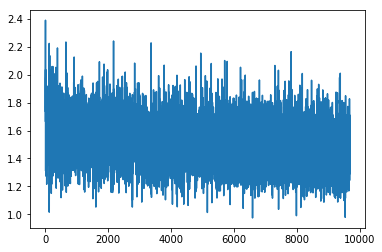

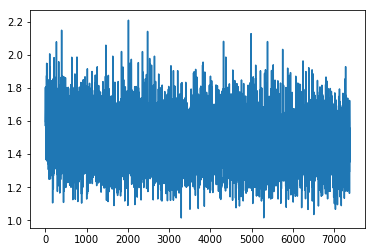

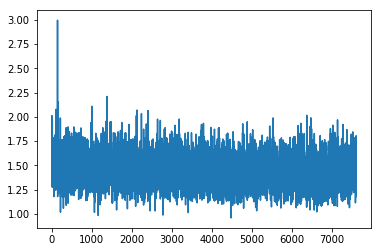

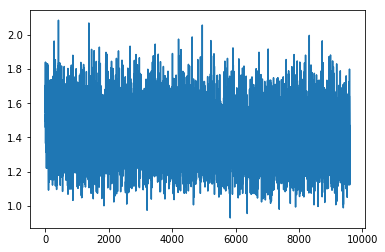

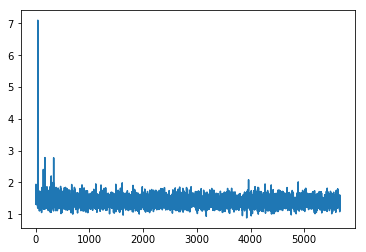

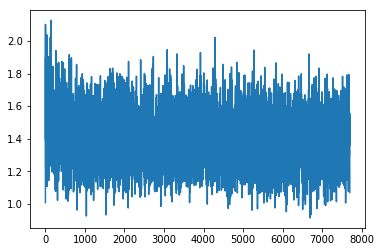

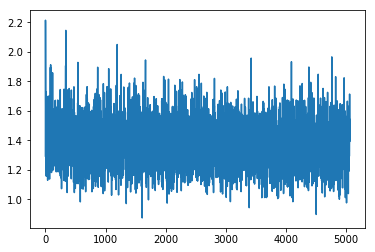

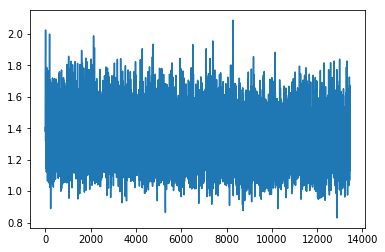

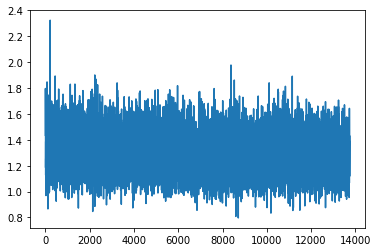

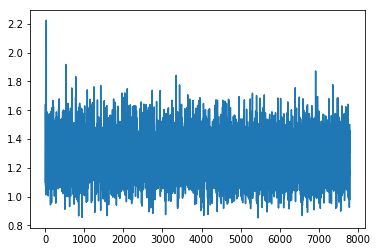

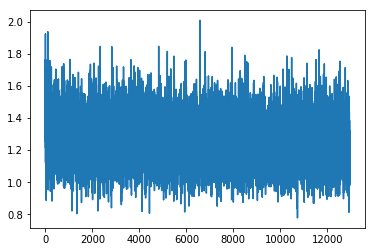

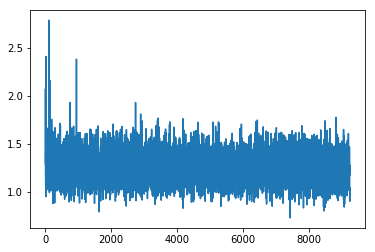

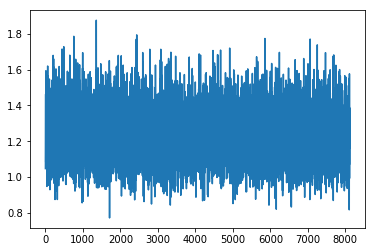

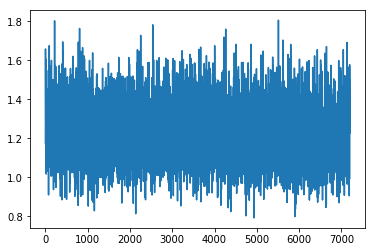

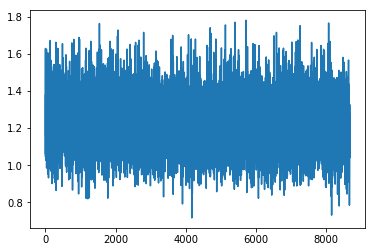

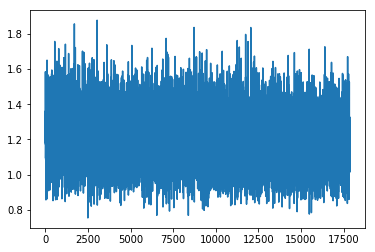

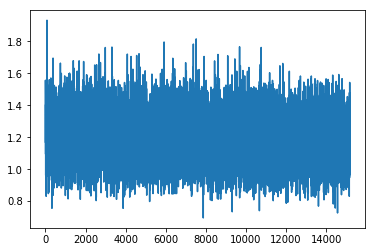

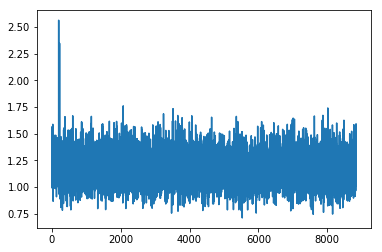

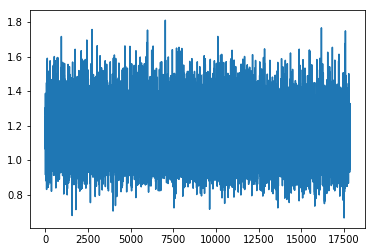

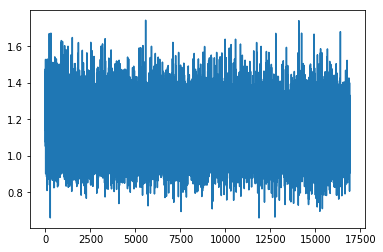

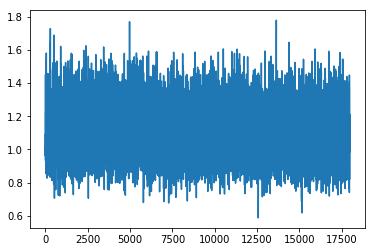

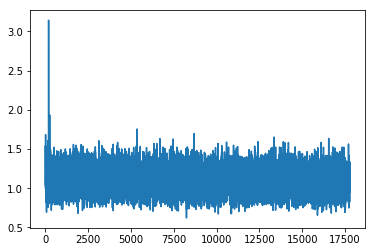

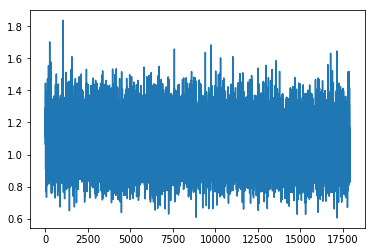

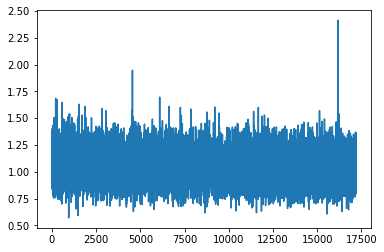

sampling, (itercount, n_drawn) =  (2, 9976)


/home/marcel/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


negative log-probability of ground-truth pars 
 6.706949446290125


/home/marcel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


sampling, (itercount, n_drawn) =  (2, 9895)


/home/marcel/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


negative log-probability of ground-truth pars 
 4.581251818626512
sampling, (itercount, n_drawn) =  (2, 9784)
negative log-probability of ground-truth pars 
 3.075861710994829
sampling, (itercount, n_drawn) =  (2, 9620)
negative log-probability of ground-truth pars 
 4.027608890026201
sampling, (itercount, n_drawn) =  (2, 9615)
negative log-probability of ground-truth pars 
 4.4640711731606615
sampling, (itercount, n_drawn) =  (2, 9333)
negative log-probability of ground-truth pars 
 4.740958888023485
sampling, (itercount, n_drawn) =  (2, 8357)
negative log-probability of ground-truth pars 
 4.784095633714784
sampling, (itercount, n_drawn) =  (2, 8487)
negative log-probability of ground-truth pars 
 4.338532064049829
sampling, (itercount, n_drawn) =  (2, 8190)
negative log-probability of ground-truth pars 
 5.089350420921434
sampling, (itercount, n_drawn) =  (3, 6487)
negative log-probability of ground-truth pars 
 5.415731150596727


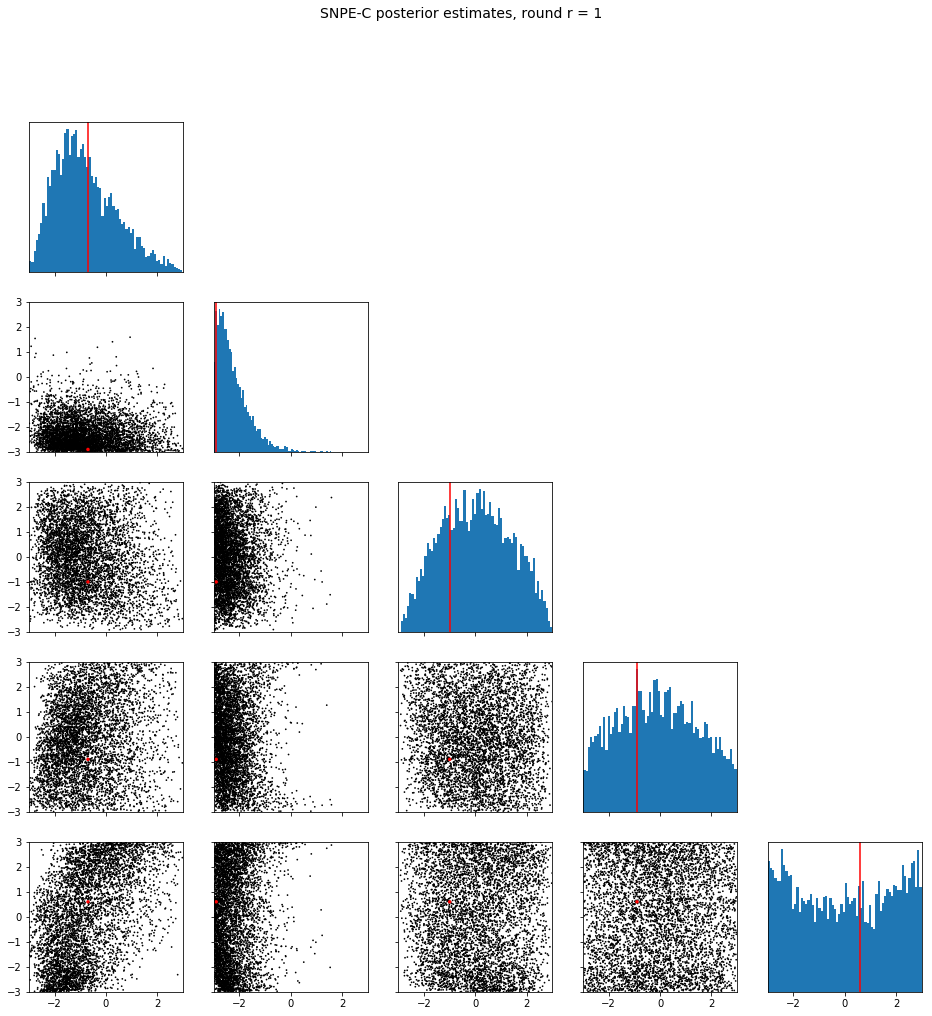

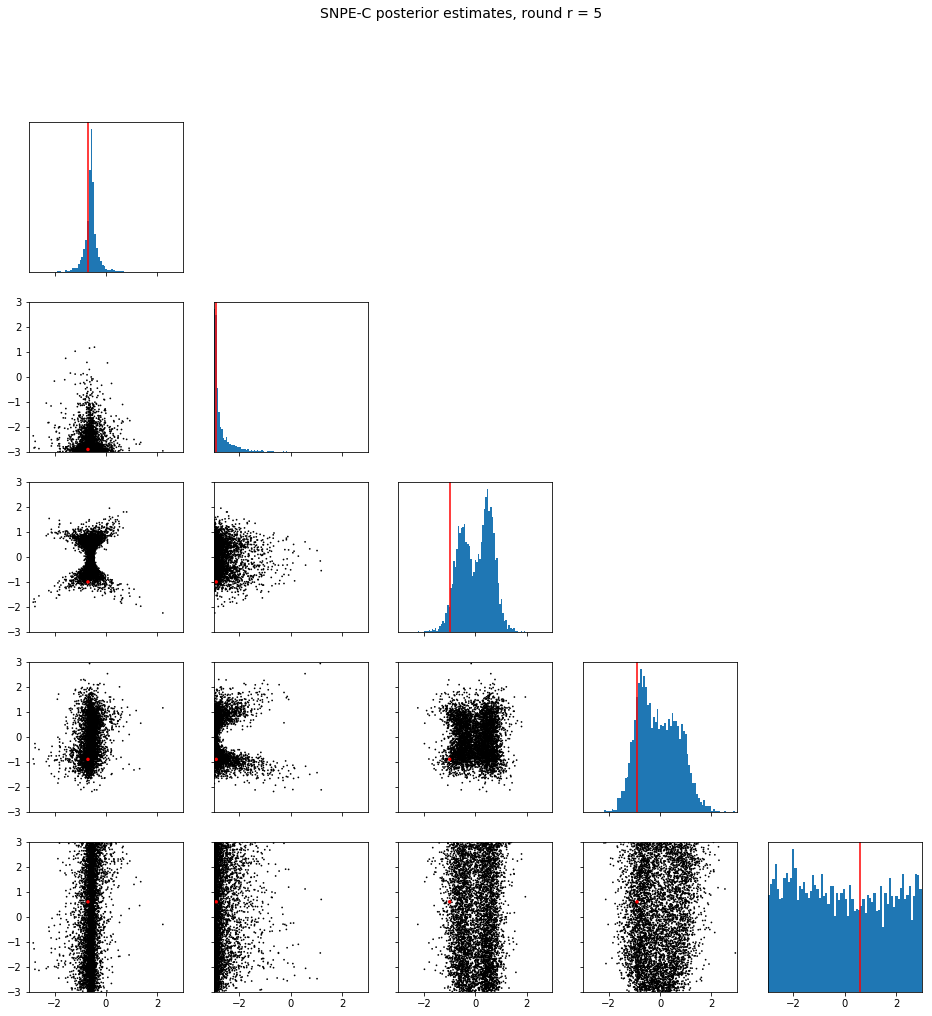

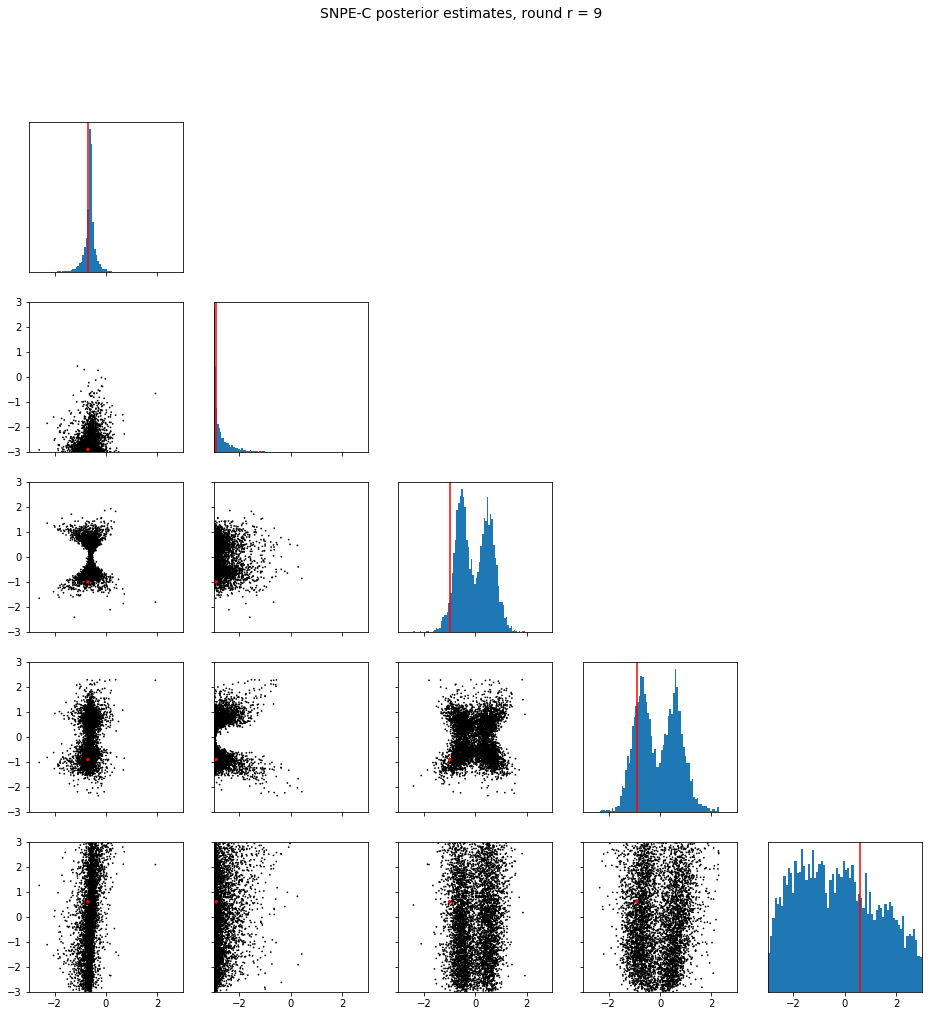

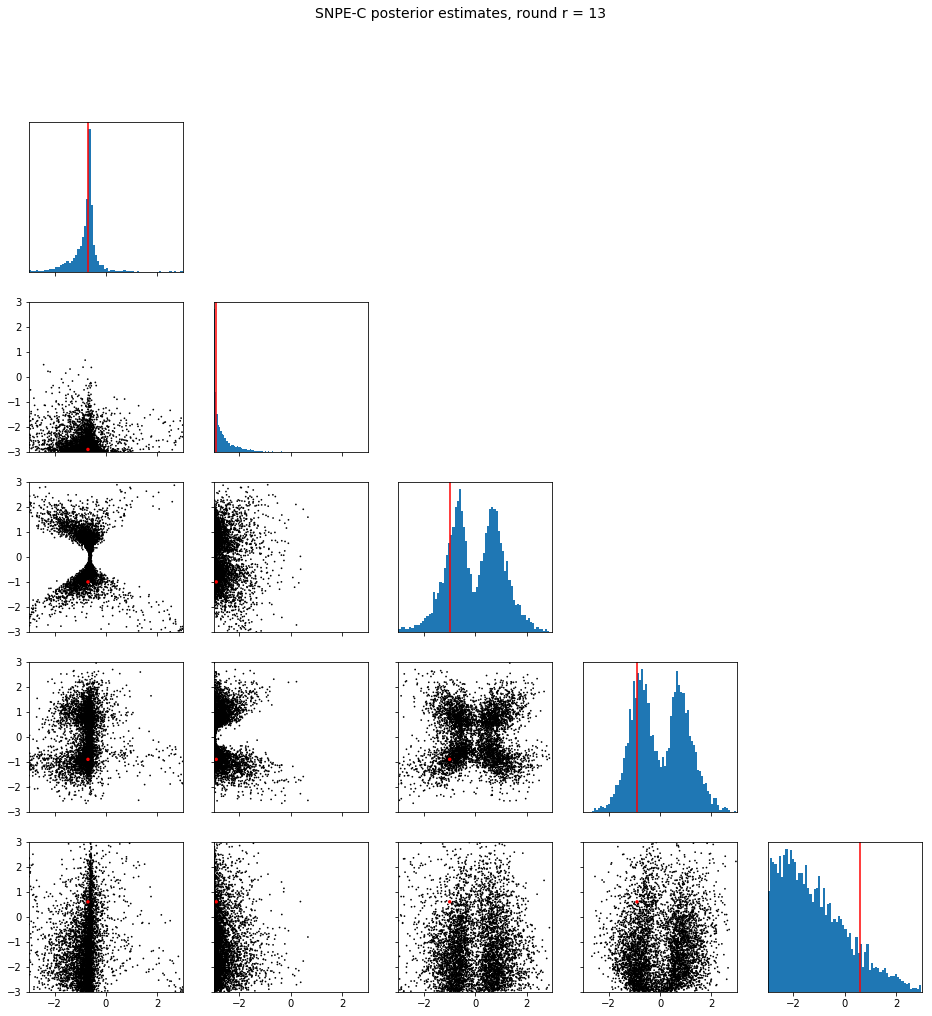

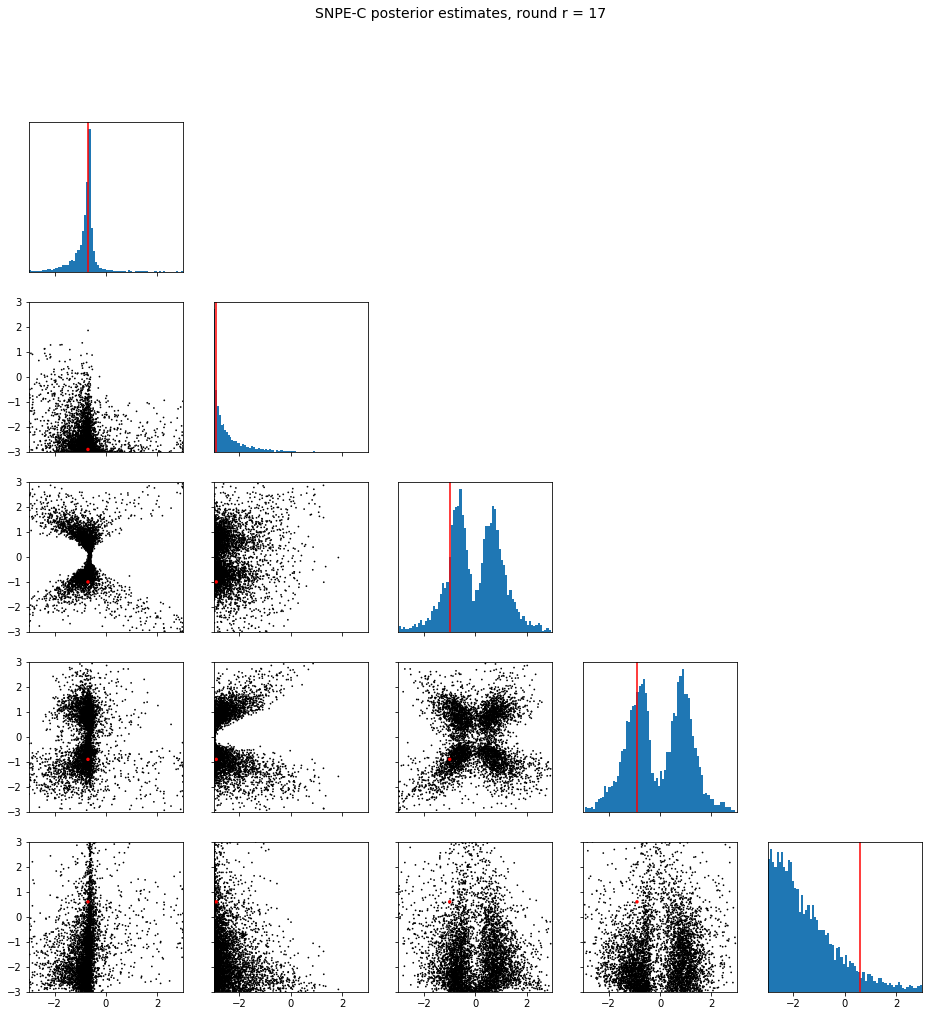

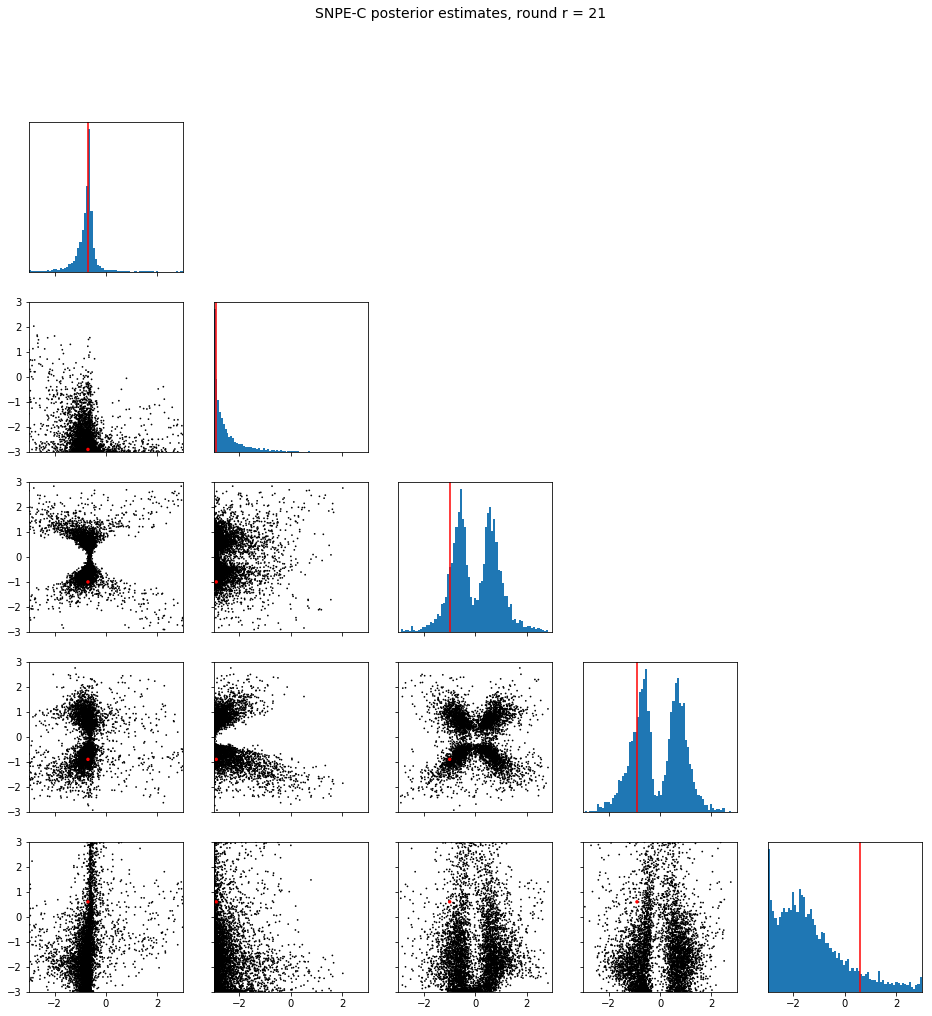

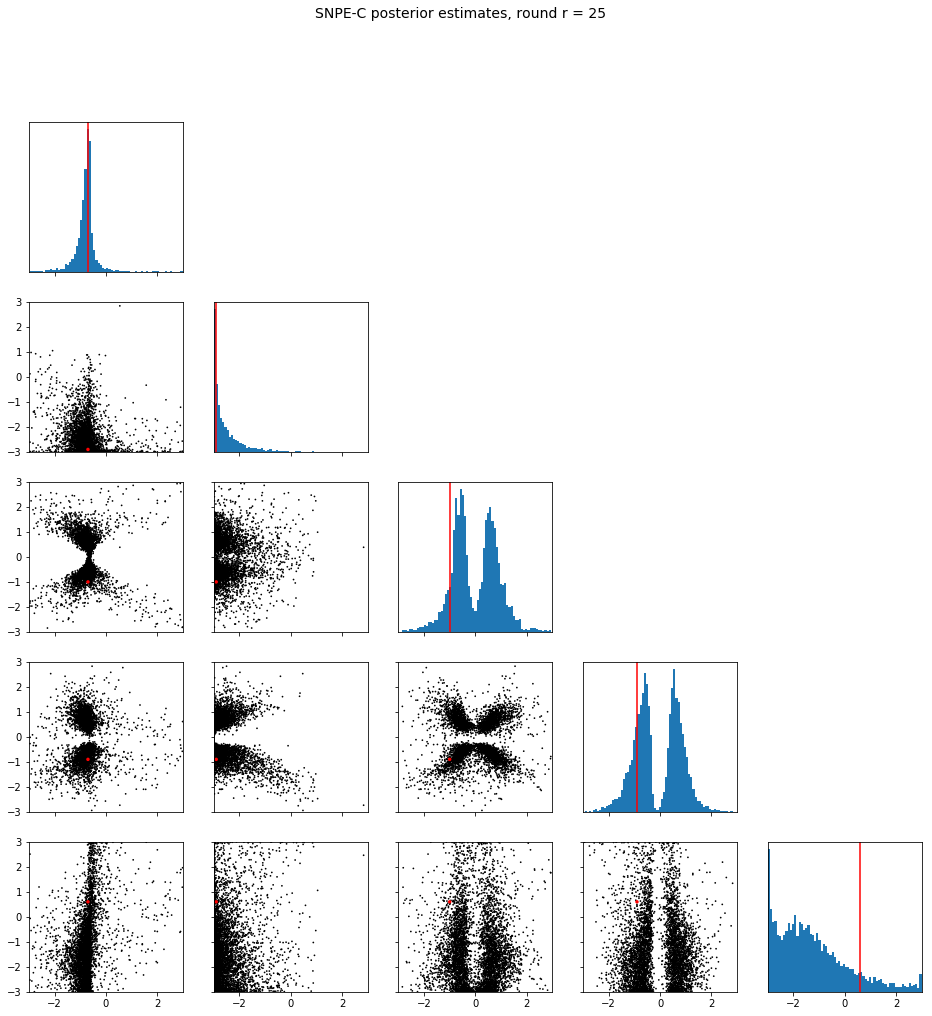

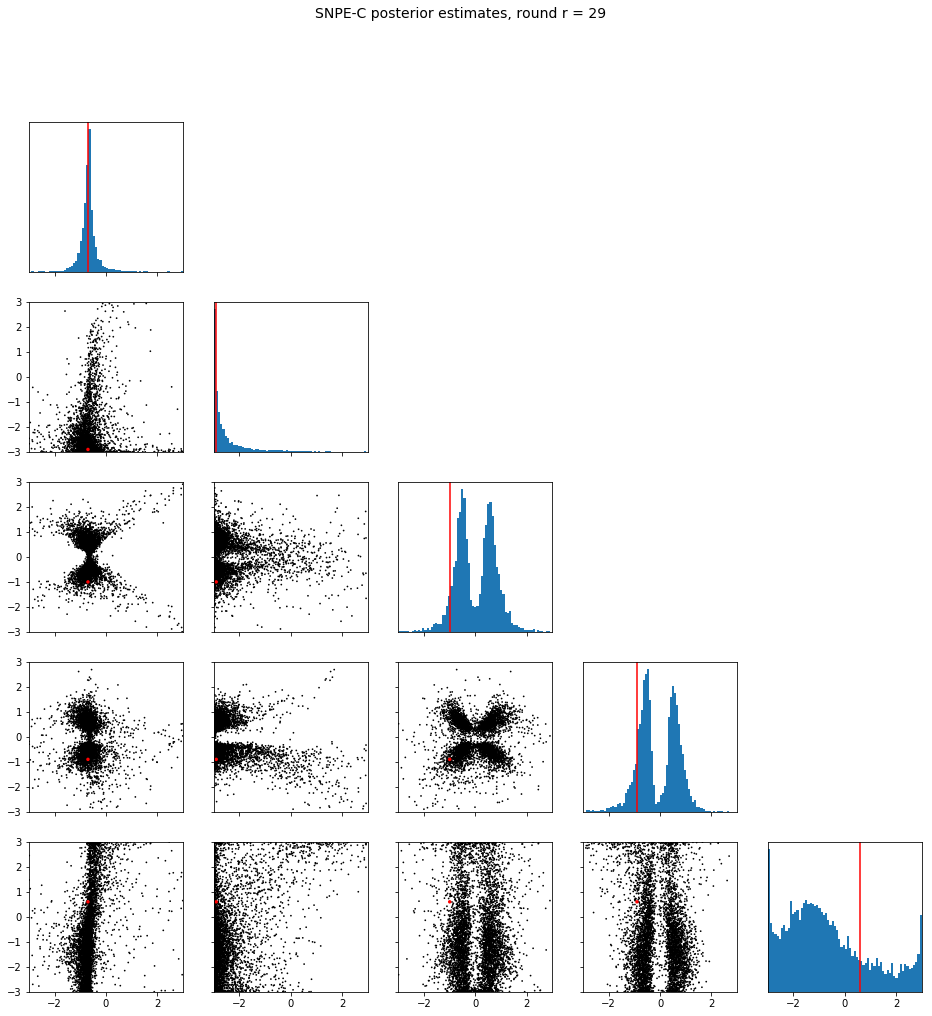

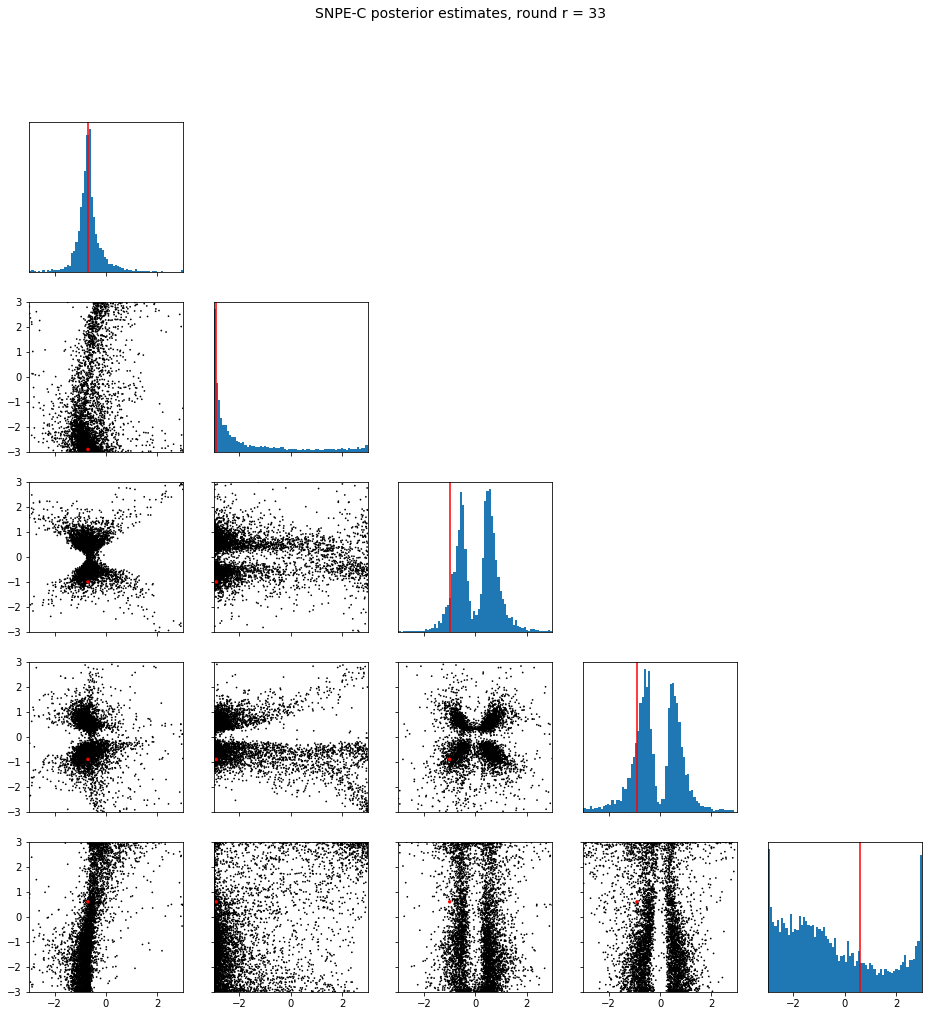

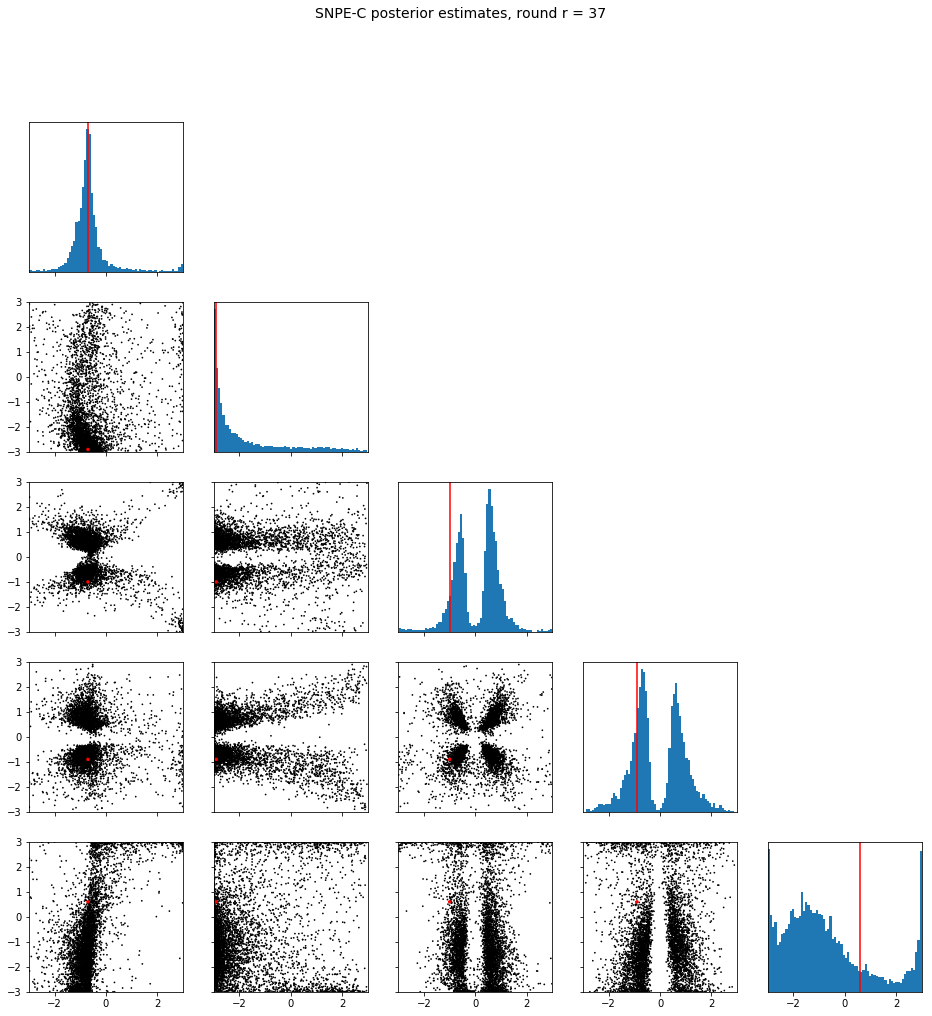

In [2]:
logs_C, tds_C, posteriors_C, setup_dict = load_results(exp_id=exp_id, path=save_path)
setup_dict = setup_dict[()]

from snl.util.plot import plot_hist_marginals
from lfimodels.snl_exps.util import draw_sample_uniform_prior_33
for r in range(setup_dict['n_rounds']):
    plt.plot(logs_C[r]['loss'])
    plt.show()

for r in np.arange(0, len(logs_C), 4):
    
    posterior_C = posteriors_C[r]
    #posterior_C.ndim = posterior_A.ndim
    
    g = init_g(seed=42)
    g.proposal = posterior_C
    samples = draw_sample_uniform_prior_33(posterior_C, 5000,patience=1000) #np.array(g.draw_params(5000)) 
    
    fig =plot_hist_marginals(samples,
                   gt=pars_true, 
                   lims=[-3,3])
    fig.set_figwidth(16)
    fig.set_figheight(16)
    
    fig.suptitle('SNPE-C posterior estimates, round r = '+str(r+1), fontsize=14)
    print('negative log-probability of ground-truth pars \n', -posterior_C.eval(pars_true, log=True))
    fig.show()

pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]

 round #1/10
- sampling
sampling, (itercount, n_drawn) =  (2, 9976)
- computing MMD

 round #2/10
- sampling
sampling, (itercount, n_drawn) =  (2, 9895)
- computing MMD

 round #3/10
- sampling
sampling, (itercount, n_drawn) =  (2, 9784)
- computing MMD

 round #4/10
- sampling
sampling, (itercount, n_drawn) =  (2, 9620)
- computing MMD

 round #5/10
- sampling
sampling, (itercount, n_drawn) =  (2, 9615)
- computing MMD

 round #6/10
- sampling
sampling, (itercount, n_drawn) =  (2, 9333)
- computing MMD

 round #7/10
- sampling
sampling, (itercount, n_drawn) =  (2, 8357)
- computing MMD

 round #8/10
- sampling
sampling, (itercount, n_drawn) =  (2, 8487)
- computing MMD

 round #9/10
- sampling
sampling, (itercount, n_drawn) =  (2, 8190)
- computing MMD

 round #10/10
- sampling
sampling, (itercount, n_drawn) =  (3, 6487)
- computin

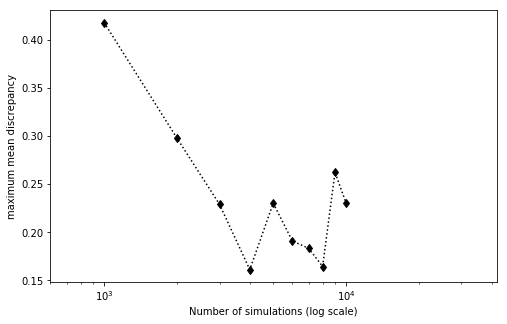

In [3]:

import timeit
import os

from lfimodels.snl_exps.util import calc_all_mmds


def run_mmd_plots(seed, model_id, save_path, exp_id, fig_path, N):

    model_id = 'gauss'

    
    # simulation setup
    setup_dict = load_setup()

    pars_true, obs_stats = load_gt(generator=init_g(seed=seed))
    print('pars_true : ', pars_true)
    print('obs_stats : ', obs_stats)

    logs, tds, posteriors, setup_dict = load_results(exp_id=exp_id, path=save_path)
    setup_dict = setup_dict[()]


    # mmd figure 
    dir = os.path.join(save_path, exp_id)
    if not os.path.exists(dir):
        os.makedirs(dir)
    samples_true = np.load(os.path.join('results/' + model_id, exp_id, 'samples.npy'))
    all_mmds = calc_all_mmds(samples_true, 
                             n_samples=N, 
                             posteriors=posteriors[::4], 
                             init_g=init_g,
                             rej=True)
    
    print('all_mmds', all_mmds)
        
    plt.figure(figsize=(8,5))
    plt.semilogx(np.arange(1, all_mmds.size+1,1) * setup_dict['n_train'], np.sqrt(all_mmds), 'kd:')
    plt.xlim([0.6*setup_dict['n_train'], (setup_dict['n_rounds']+2)*setup_dict['n_train']])
    plt.xlabel('Number of simulations (log scale)')
    plt.ylabel('maximum mean discrepancy')
    plt.show()


N = 5000

fig_path = 'results/'
exp_id = 'seed'+str(seed)        
run_mmd_plots(seed=seed, model_id=model_id, save_path=save_path, exp_id=exp_id, fig_path=fig_path, N=N)

In [ ]:
# add box constraints to support of conditional MAF
setup_dict['upper'] =  3.05
setup_dict['lower'] = -3.05
setup_dict['n_rounds'] = 10

# fit SNPE-C

In [ ]:
if setup_dict['train_on_all']:
    epochs=[setup_dict['epochs']//(r+1) for r in range(setup_dict['n_rounds'])]
else:
    epochs=setup_dict['epochs']

# control MAF seed
rng = np.random
rng.seed(seed)

# generator
g = init_g(seed=seed)
    
res_C = infer.SNPEC(g,
                    obs=obs_stats,
                    n_hiddens=setup_dict['n_hiddens'],
                    seed=seed,
                    reg_lambda=setup_dict['reg_lambda'],
                    pilot_samples=setup_dict['pilot_samples'],
                    svi=setup_dict['svi'],
                    n_mades=setup_dict['n_mades'],
                    act_fun=setup_dict['act_fun'],
                    mode=setup_dict['mode'],
                    rng=rng,
                    batch_norm=setup_dict['batch_norm'],
                    verbose=setup_dict['verbose'],
                    upper=setup_dict['upper'], # box-constraints 
                    lower=setup_dict['lower'], # for MAF support
                    prior_norm=setup_dict['prior_norm'])


# train
t = timeit.time.time()

print('fitting model with SNPC-C')
logs_C, tds_C, posteriors_C = res_C.run(
                    n_train=setup_dict['n_train'],
                    proposal=setup_dict['proposal'],
                    moo=setup_dict['moo'],
                    n_null = setup_dict['n_null'],
                    n_rounds=setup_dict['n_rounds'],
                    train_on_all=setup_dict['train_on_all'],
                    minibatch=setup_dict['minibatch'],
                    epochs=epochs)

print('fitting time : ', timeit.time.time() - t)

In [ ]:
res_C.network

# store results

In [ ]:
#save_results(logs=logs_C, tds=tds_C, posteriors=posteriors_C, 
#             setup_dict=setup_dict, exp_id=exp_id, path=save_path)

#logs, tds, posteriors, setup_dict = load_results(exp_id=exp_id, path=path)

# inspect results

In [ ]:
for r in range(setup_dict['n_rounds']):
    plt.plot(logs_C[r]['loss'])
    plt.show()

for r in np.arange(0, len(logs_C), 1):
    
    posterior_C = posteriors_C[r]
    #posterior_C.ndim = posterior_A.ndim
    
    g = init_g(seed=42)
    g.proposal = posterior_C
    samples = posterior_C.gen(5000) #np.array(g.draw_params(5000)) 
    
    fig,_ = plot_pdf(dd.Gaussian(m=0.00000123*np.ones(pars_true.size), S=1e-30*np.eye(pars_true.size)), 
                   samples=samples.T,
                   gt=pars_true, 
                   #lims=[[-3,3],[-3,3],[-3,3],[-3,3],[-3,3]],
                   #lims=[0,10],
                   resolution=100,
                   ticks=True,
                   figsize=(16,16));
    
    fig.suptitle('SNPE-C posterior estimates, round r = '+str(r+1), fontsize=14)
    print('negative log-probability of ground-truth pars \n', -posterior_C.eval(pars_true, log=True))

# marginal over summary statistics (plus best-fitting Gaussian approx.)

In [ ]:
stats = tds_C[0][1]
fig,_ = plot_pdf(dd.Gaussian(m=stats.mean(axis=0), S=np.cov(stats.T)), 
                   samples=stats.T,
                   gt=((obs_stats-res_C.stats_mean)/res_C.stats_std).flatten(), 
                   ticks=True,
                   resolution=100,
                   figsize=(16,16));
fig.suptitle('(pair-wise) marginal(s) over summary statistics from Gaussian model (already z-scored!)')
#fig.savefig('/home/marcel/Desktop/gauss_summary_stats_marginals.pdf')
fig.show()

# results evaluation

In [ ]:
all_prop_errs = calc_all_lprob_errs(pars_true, 
                                    n_samples=5000, 
                                    #posteriors=[posteriors_C[i] for i in np.arange(4,50,5)], 
                                    posteriors=posteriors_C, 
                                    init_g=init_g,
                                    rej=True)

all_prop_errs_raw = calc_all_lprob_errs(pars_true, 
                                    n_samples=5000, 
                                    #posteriors=[posteriors_C[i] for i in np.arange(4,50,5)], 
                                    posteriors=posteriors_C, 
                                    init_g=init_g,
                                    rej=False)

plt.figure(figsize=(8,5))
plt.semilogx(np.arange(0, setup_dict['n_rounds'],1) * setup_dict['n_train'], all_prop_errs, 'bd:')
plt.semilogx(np.arange(0, setup_dict['n_rounds'],1) * setup_dict['n_train'], all_prop_errs_raw, 'kd:')
plt.legend(['rej. sampling', 'naive sampling'])
plt.axis([600, 55000, 0, 10])
plt.xlabel('Number of simulations (log scale)')
plt.ylabel('- log probability of true parameters')
plt.title('effects of truncation on MAF')
#plt.savefig('/home/marcel/Desktop/gauss_snpec_maf_n_null_10_N5000_MAF_truncation.pdf')
plt.show()

In [ ]:
all_prop_errs, all_prop_errs_raw